# Adrian Goik s23970 Raport 2 - Grupowanie

<h4>Przesłanie rozwiązania</h4><br>
Rozwiązanie powinno być w formie małego sprawozdania w pliku pdf / html / doc i powinno obejmować zadania 2,3,4. Można je zrobić ręcznie lub Jupyterem, lub inną techniką. Nazwa pliku powinna być: Raport2XXXXXX.YYY gdzie XXXX nazwisko, a YYY rozszerzenie pliku.<br>
Sprawozdanie powinno zawierać wstawki kodu (komendy), ich wyniki, twoje komentarze i ewentualnie inne elementy np. twoje obliczenia. <br>
Nie powinno przekraczać 1 MB pamięci.

<b><i>Na wyższą liczbę punktów mają wpływ następujące rzeczy:</b></i>
<ol>
<li>• Dobra struktura sprawozdania (wprowadzenie, eksperymenty, objaśnienia, interpretacje).</li>
<li>• Szczegółowość i dokładność eksperymentów, dodawanie komentarzy i własnych interpretacji wyników</li>
<li>• Dobre przygotowanie bazy danych do eksperymentów</li>
<li>• Przejrzystość i estetyka prezentacji</li>
<li>• Nadprogramowe analizy mile widziane…</li>
</ol>

<ol><p style="color:red">KRYTERIA OCENY:
Dobra struktura sprawozdania (wprowadzenie, eksperymenty, objaśnienia, interpretacje).
<li>Szczegółowość i dokładność eksperymentów, dodawanie komentarzy i własnych interpretacji wyników</li>
<li>Dobre przygotowanie bazy danych do eksperymentów</li>
<li>Przejrzystość i estetyka prezentacji</li>
<li>• Nadprogramowe analizy mile widziane…</li>
</p></ol>


### PRZYGOTOWANIE I ANALIZA DANYCH PRZED PRZYSTĄPIENIEM DO ZADANIA

<h4><b><i>Baza Danych Iris2d.csv składa się z:</b></i><h5>
<p style="color:green"><h5><i>
PC1 i PC2 to pierwsze dwie główne składowe (ang. Principal Components) uzyskane z analizy głównych składowych (ang. Principal Component Analysis, PCA).</i></h5> <br>
<h5>PCA jest techniką analizy statystycznej, która służy do redukcji wymiarowości danych. PCA jest znalezienie nowych, zredukowanych wymiarów (głównych składowych), które uchwycą jak najwięcej zmienności w danych przy jednoczesnym zmniejszeniu liczby wymiarów.</h5>
<ol>
<li>PC1 (Pierwsza Główna Składowa): To kierunek w przestrzeni danych, który maksymalizuje wariancję danych. Innymi słowy, jest to kierunek, w którym dane mają największe rozproszenie.</li><li>PC2 (Druga Główna Składowa): To kolejny ortogonalny kierunek (prostopadły do PC1) w przestrzeni danych, który maksymalizuje pozostałą wariancję. PC2 jest wybierany w taki sposób, aby był niezależny od PC1.</li>
</ol>

In [4]:
import pandas as pd
from sklearn.cluster import KMeans

iris_db=pd.read_csv('iris2D.csv')
print(iris_db)

     Unnamed: 0     "PC1"     "PC2"
0             0 -2.264703  0.480027
1             1 -2.080961 -0.674134
2             2 -2.364229 -0.341908
3             3 -2.299384 -0.597395
4             4 -2.389842  0.646835
..          ...       ...       ...
145         145  1.870503  0.386966
146         146  1.564580 -0.896687
147         147  1.521170  0.269069
148         148  1.372788  1.011254
149         149  0.960656 -0.024332

[150 rows x 3 columns]


In [5]:
iris_db.describe()

,Unnamed: 0,"""PC1""","""PC2"""
count,150.000000,1.500000e+02,1.500000e+02
mean,74.500000,1.894781e-16,1.776357e-17
std,43.445368,1.714084e+00,9.592523e-01
min,0.000000,-2.774345e+00,-2.654073e+00
25%,37.250000,-2.102721e+00,-5.984875e-01
50%,74.500000,4.183111e-01,1.750202e-02
75%,111.750000,1.343027e+00,5.940342e-01
max,149.000000,3.310696e+00,2.686284e+00


### Zadanie 2
<i>Ściągnij bazę danych iris2D.csv (jest to 150 irysów skompresowanych przez PCA do dwóch wymiarów) i przetestuj na niej grupowanie metodą k-średnich, przyjmując k=3. Zwizualizuj klastry na wykresie punktowym. Każdy irys to punkt, a różne klastry mają różne kolory.</i>

Na początek za pomocą biblioteki matplotlib zwizualizuję rozkład danych

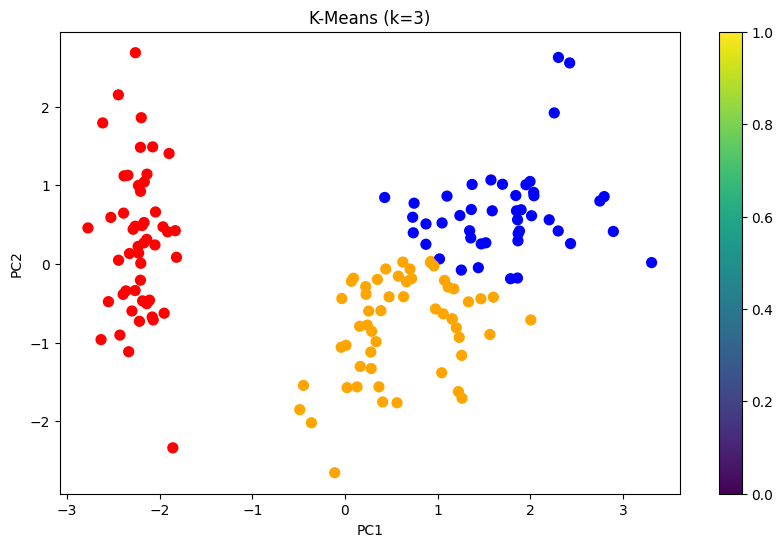

In [34]:
import os
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

os.environ["LOKY_MAX_CPU_COUNT"] = "4" # troubleshooting dla biblioteki joblib którą używa scikit


file_path = "iris2D.csv"
iris_db = pd.read_csv(file_path)

iris_db = iris_db.drop(columns=['Unnamed: 0'])
iris_db.columns = iris_db.columns.str.strip().str.replace('"', '') 

kmeans = KMeans(n_clusters=3)
iris_db['Cluster']=kmeans.fit_predict(iris_db)
colors = ['blue', 'red', 'orange']
cluster_colors = [colors[label] for label in iris_db['Cluster']]

#Teraz przedstawić wyniki graficznie
plt.figure(figsize=(10, 6))
plt.scatter(iris_db['PC1'], iris_db['PC2'], c=cluster_colors, s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means (k=3)')
plt.colorbar()
plt.show()

<h4>W ramach eksperymentów wypiszemy centroidy i granice decyji. </h4>

In [17]:
#CENTROIDY
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.63395833  0.48398172]
 [-2.23223542  0.34252628]
 [ 0.42417016 -0.94353874]]


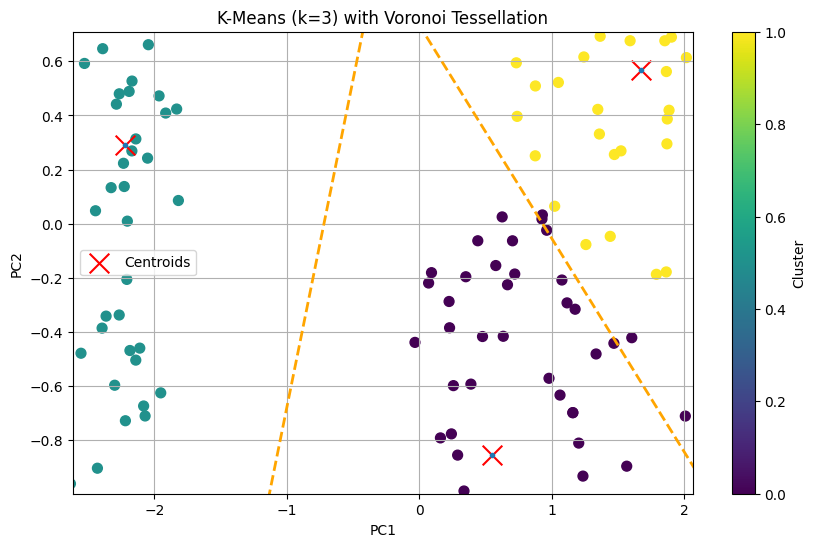

In [22]:
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Tworzenie diagramu Voronoi
vor = Voronoi(centroids)

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=2)
plt.scatter(iris_db['PC1'], iris_db['PC2'], c=iris_db['Cluster'], cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means (k=3) with Voronoi Tessellation')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()


<h4>Zadanie 3</h4><br>
<h6>Podobnie jak w zadaniu drugim, przetestuj jak działa algorytm grupowania opartego na gęstości: DBSCAN. Poeksperymentuj z doborem parametrów algorytmu. Powstałe klastry przedstaw na wykresie punktowym. Wyjaśnij w kilku zdaniach ogólną ideę działania algorytmu.</h6>
 

<h5> Wstęp teoretyczny do zadania </h5>

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to algorytm grupowania danych, który identyfikuje klastry w zbiorze danych, biorąc pod uwagę gęstość punktów. <br>
Algorytm ten jest szczególnie użyteczny, ponieważ potrafi wykrywać klastry o dowolnym kształcie i rozmiarze oraz jest odporny na szum (punkty odstające).

Algorytm przyjmuje dwa parametry wejściowe (należy je dobrać pod kątem konkretnego zagadnienia):<br>
eps - maksymalny promień sąsiedztwa<br>
MinPts - minimalna liczba obiektów wchodzących w skład klastra.


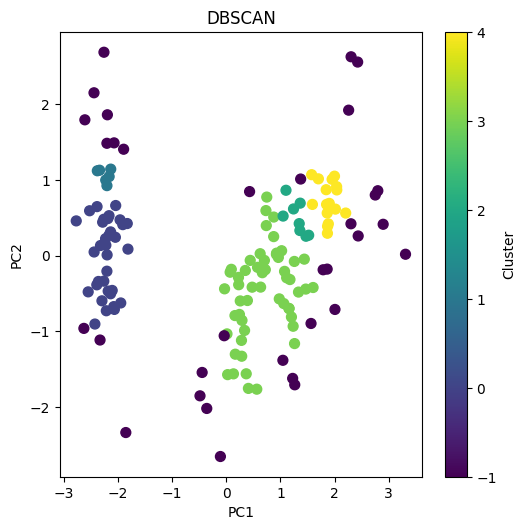

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN

file_path = "iris2D.csv"
iris_db = pd.read_csv(file_path)

iris_db = iris_db.drop(columns=['Unnamed: 0'])
iris_db.columns = iris_db.columns.str.strip().str.replace('"', '')  

dbscan = DBSCAN(eps=0.3, min_samples=5)
iris_db['Cluster'] = dbscan.fit_predict(iris_db[['PC1', 'PC2']])


plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1) 
plt.scatter(iris_db['PC1'], iris_db['PC2'], c=iris_db['Cluster'], cmap='viridis', s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('DBSCAN')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()



<h4>Eksperymentowanie z różnymi parametrami epis i MinPts </h4>

<Figure size 1500x1000 with 0 Axes>

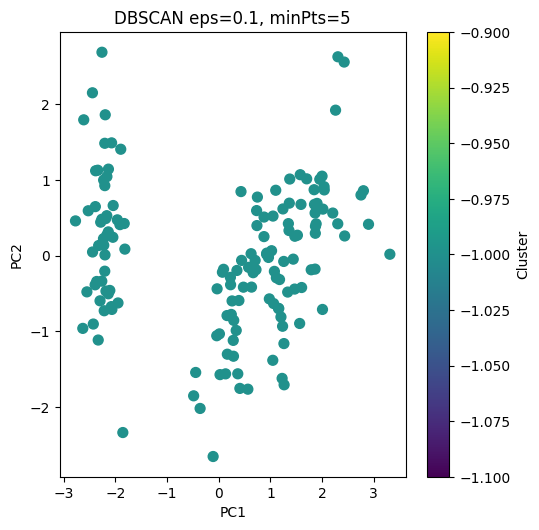

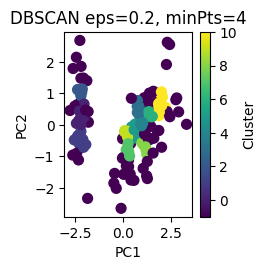

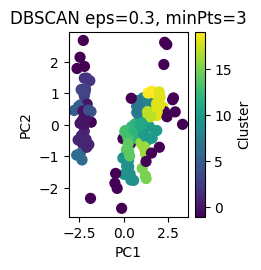

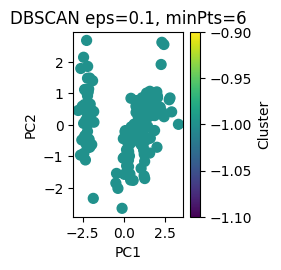

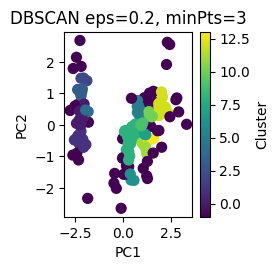

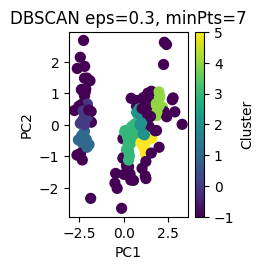

<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN

file_path = "iris2D.csv"
iris_db = pd.read_csv(file_path)

iris_db = iris_db.drop(columns=['Unnamed: 0'])
iris_db.columns = iris_db.columns.str.strip().str.replace('"', '')  

plt.figure(figsize=(15, 10))


def dbscan(epsilon, minpts, sp_index):
    dbscan = DBSCAN(eps=epsilon, min_samples=minpts)
    iris_db['Cluster'] = dbscan.fit_predict(iris_db)
    iris_db['Cluster'] = dbscan.fit_predict(iris_db)
    
    plt.subplot(2, 3, sp_index)
    plt.scatter(iris_db['PC1'], iris_db['PC2'], c=iris_db['Cluster'], cmap='viridis', s=50)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'DBSCAN eps={epsilon}, minPts={minpts}')
    plt.colorbar(label='Cluster')
    
    plt.tight_layout()
    plt.show()
    
plt.figure(figsize=(15, 10))

params = [
    (0.1, 5, 1),
    (0.2, 4, 2),
    (0.3, 3, 3),
    (0.1, 6, 4),
    (0.2, 3, 5),
    (0.3, 7, 6),
]

for epsilon, minpts, subplot_index in params:
    dbscan(epsilon, minpts, subplot_index)

plt.tight_layout()
plt.show()

Jak widzimy największym problemem w dojściu do poprawnej klasyfikacji są punkty odstające od klastrów. DBSCAN może być także użyty do ich przerzedzenia. Spróbujmy ustawić minpts jako 3, tak jak powyżej dwa rekordy blisko siebie, uznane przez algorytm jako osobny klaster.

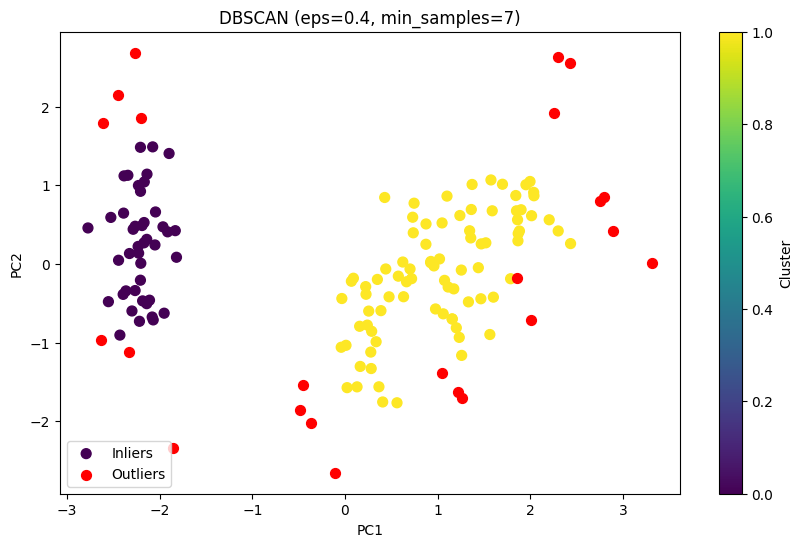

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN

file_path = "iris2D.csv"
iris_db = pd.read_csv(file_path)

iris_db = iris_db.drop(columns=['Unnamed: 0'])
iris_db.columns = iris_db.columns.str.strip().str.replace('"', '')  


def dbscan(epsilon, minpts):
    dbscan = DBSCAN(eps=epsilon, min_samples=minpts)
    iris_db['Cluster'] = dbscan.fit_predict(iris_db[['PC1', 'PC2']])
    return iris_db


epsilon = 0.4
min_samples = 7
iris_db = dbscan(epsilon, min_samples)


inliers = iris_db[iris_db['Cluster'] != -1]
outliers = iris_db[iris_db['Cluster'] == -1]
plt.figure(figsize=(10, 6))

plt.scatter(inliers['PC1'], inliers['PC2'], c=inliers['Cluster'], cmap='viridis', s=50, label='Inliers')

plt.scatter(outliers['PC1'], outliers['PC2'], c='red', s=50, label='Outliers')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'DBSCAN (eps={epsilon}, min_samples={min_samples})')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

Po użyciu różnych parametrów 0.4 i 7 widzimy oznaczone punkty odstające od klastrów i otrzymany wynik przypomina kmean dla 2 klatrów.

<h4> Zadanie 4 </h4> <br>
Jak można weryfikować poprawność algorytmu grupującego? Zajrzyj pod link https://en.wikipedia.org/wiki/Cluster_analysis i rozdział Evaluation (External Evaluation).
Dla algorytmów grupujących z zadania 2 i 3 dokonaj oceny obliczając:<br>
<ol>

<li>Czystość (purity) klastrów. Do tego celu trzeba będzie wykorzystać tak zwaną confusion matrix:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cluster.contingency_matrix.html</li>

<li>Zgodność klastrów z prawdziwymi klasami (Rand Index).
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.rand_score.html#sklearn.metrics.rand_score
Do obliczeń potrzebny jest oryginalny plik z danymi zawierający etykiety klas. Jest to plik danych, który znajdziemy w materiałach (plik irisORG.csv).</li>
</ol>

<h4>Nowa baza - warto ją wyświetlić</h4>

In [4]:
import pandas as pd

irisORG_db=pd.read_csv('irisORG.csv')
print(iris_db)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]


In [9]:
lbl = irisORG_db['variety']
print(lbl)

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object


In [25]:
import pandas as pd

# Load the datasets
file_path_original = "irisORG.csv"
file_path_2D = "iris2D.csv"

iris_org = pd.read_csv(file_path_original)
iris_db = pd.read_csv(file_path_2D)

# Clean up the datasets
iris_org.columns = iris_org.columns.str.strip().str.replace('"', '')  
iris_db.columns = iris_db.columns.str.strip().str.replace('"', '')  

# Drop unnecessary column in the 2D dataset
iris_db = iris_db.drop(columns=['Unnamed: 0'])

# Inspect the columns of the datasets
print("Columns in the original dataset:", iris_org.columns)
print("Columns in the 2D dataset:", iris_db.columns)


Columns in the original dataset: Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')
Columns in the 2D dataset: Index(['PC1', 'PC2'], dtype='object')


       Metric    DBSCAN    KMeans
0      Purity  0.620000  0.666667
1  Rand Index  0.576734  0.721432


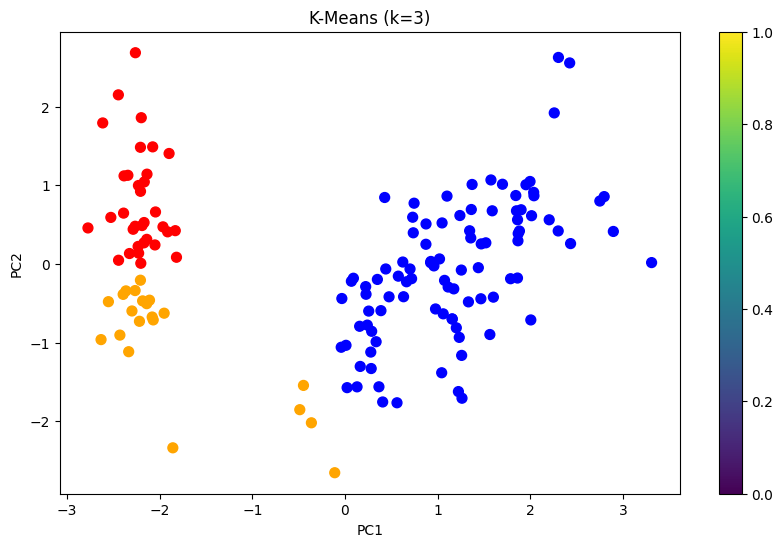

In [33]:
import os
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import rand_score
import numpy as np
import matplotlib.pyplot as plt

os.environ["LOKY_MAX_CPU_COUNT"] = "4" # troubleshooting dla biblioteki joblib którą używa scikit


X = iris_db[['PC1', 'PC2']]
true_labels = iris_org['variety']

dbscan = DBSCAN(eps=0.2, min_samples=5)
predicted_labels_dbscan = dbscan.fit_predict(X)
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels_kmeans = kmeans.fit_predict(X)

#Dla algorytmów grupujących z zadania 2 i 3 dokonaj oceny obliczając:


# Czystość (purity) klastrów. Do tego celu trzeba będzie wykorzystać tak zwaną contingency matrix:
contingency_dbscan = contingency_matrix(true_labels, predicted_labels_dbscan)
purity_dbscan = np.sum(np.amax(contingency_dbscan, axis=0)) / np.sum(contingency_dbscan)

# Zgodność klastrów z prawdziwymi klasami (Rand Index). DBSCAN
rand_index_dbscan = rand_score(true_labels, predicted_labels_dbscan)

# Czystość (purity) klastrów. Do tego celu trzeba będzie wykorzystać tak zwaną contongency matrix:
contingency_kmeans = contingency_matrix(true_labels, predicted_labels_kmeans)
purity_kmeans = np.sum(np.amax(contingency_kmeans, axis=0)) / np.sum(contingency_kmeans)

# Zgodność klastrów z prawdziwymi klasami (Rand Index). KMEANS
rand_index_kmeans = rand_score(true_labels, predicted_labels_kmeans)

# Stworzenie ramki do wyświetlania efektów
evaluation_df = pd.DataFrame({
    'Metric': ['Purity', 'Rand Index'],
    'DBSCAN': [purity_dbscan, rand_index_dbscan],
    'KMeans': [purity_kmeans, rand_index_kmeans]
})

print(evaluation_df)

#KMEANS
colors = ['blue', 'red', 'orange']
cluster_colors = [colors[label] for label in predicted_labels_kmeans]

plt.figure(figsize=(10, 6))
plt.scatter(iris_db['PC1'], iris_db['PC2'], c=cluster_colors, s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means (k=3)')
plt.colorbar()
plt.show()



WNIOSKI: Dla Rand Index i Purity 1 to najlepszy wynik, z czego szybko można wywnioskować, że kMeans dla n=3 pomyłki są zdecydowanie mniejsze niż dla DBSCAN. Łatwiej też dobrać parametry w  KMEANS niż DBSCAN.